In [2]:
import pandas as pd
import numpy as np
from plotutils import *
from matplotlib import pyplot as plt

In [3]:
logdir='../IPG/test/log'; date='07_17_2021'
subsolver='projectedGD'; warm_start=True
loss='logit'; lam_shrink=[0.1, 0.05]; group_size=[10, 100]; overlap_ratio=[0.1, 0.3, 0.5]
excludes= None

In [4]:
inexact_type='4'; param1_lst = [1-1e-5]
param2_lst = [0.1]
algo_df_dict_inexact_type4 = get_all(logdir, date, inexact_type, loss, subsolver, warm_start,
                             lam_shrink, group_size, overlap_ratio,
                             excludes, param1_lst, param2_lst)

time_type4 = []
for key in algo_df_dict_inexact_type4.keys():
    df_ = algo_df_dict_inexact_type4[key]
    time_ = np.sum(df_['time'])
    time_type4.append(time_)

4-projectedGD-True-0.99999-0.1
 72/72 instances terminate with status:  0


In [5]:
loss='logit'; lam_shrink=[0.1, 0.05]; group_size=[10, 100]; overlap_ratio=[0.1, 0.3, 0.5]
excludes= None
inexact_type=2; param1_lst = [1e-5]; param2_lst = [0.1]
algo_df_dict_inexact_type2_part1 = get_all(logdir, '07_17_2021', inexact_type, loss, subsolver, warm_start,
                             lam_shrink, group_size, overlap_ratio,
                             excludes, param1_lst, param2_lst)
df_2 = algo_df_dict_inexact_type2_part1['2-projectedGD-True-1e-05-0.1']

2-projectedGD-True-1e-05-0.1
 72/72 instances terminate with status:  0


In [6]:
df_4 = algo_df_dict_inexact_type4['4-projectedGD-True-0.99999-0.1']

All algorithms failed in 0 instances (failure code 2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 72 instances are kept.
2-projectedGD-True-1e-05-empty Win:38 | Lose:34


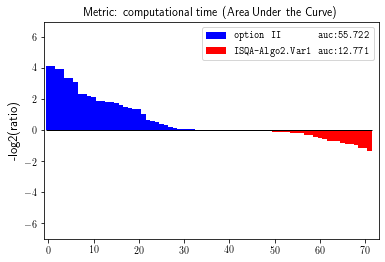

In [13]:
final = {}
final['2-projectedGD-True-1e-05-empty'] = df_2
final['4-projectedGD-True-0.99999-0.1'] = df_4
ppf = PerformanceProfile(final, failcode=2)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
_ = ppf.plot(column='time',show_num=False, options={'ratio_max':7}, save=True, saveDir='./natOG/', labels=['option II \ \ \ \ \ \ ', 'ISQA-Algo2.Var1'])

In [8]:
cols = ['datasetid', 'F', 'time', 'nz']
df24_merged = pd.merge(df_2, df_4, on='datasetid', suffixes=("_type2", "_type4"), how='left')
better24_z = np.sum((df24_merged['nz_type2'] - df24_merged['nz_type4']) > 0 ) 
same24_z = np.sum((df24_merged['nz_type2'] - df24_merged['nz_type4']) == 0 ) 
worse24_z = np.sum((df24_merged['nz_type2'] - df24_merged['nz_type4']) <0 ) 

better24_F = np.sum((df24_merged['F_type2'] - df24_merged['F_type4']) < -1e-8 ) 
same24_F = np.sum(np.abs(df24_merged['F_type2'] - df24_merged['F_type4']) <=1e-8 ) 
worse24_F = np.sum((df24_merged['F_type2'] - df24_merged['F_type4']) > 1e-8 ) 

print("For 2-4 comparsion:\n==========================")
print(" In terms final F:")
print(f"  better:{better24_F} | same:{same24_F} | worse: {worse24_F}")
print(" In terms #z:")
print(f"  better:{better24_z} | same:{same24_z} | worse: {worse24_z}")

For 2-4 comparsion:
 In terms final F:
  better:18 | same:37 | worse: 17
 In terms #z:
  better:14 | same:41 | worse: 17


# Fallback 0 versus Fallback 1000

In [14]:
inexact_type='4_fallback0'; param1_lst = [1-1e-5]
param2_lst = [0.1]
algo_df_dict_inexact_type4_2 = get_all(logdir, date, inexact_type, loss, subsolver, warm_start,
                             lam_shrink, group_size, overlap_ratio,
                             excludes, param1_lst, param2_lst)

time_type4_2 = []
for key in algo_df_dict_inexact_type4_2.keys():
    df_ = algo_df_dict_inexact_type4_2[key]
    time_ = np.sum(df_['time'])
    time_type4_2.append(time_)    
df_42 = algo_df_dict_inexact_type4_2['4_fallback0-projectedGD-True-0.99999-0.1']    

4_fallback0-projectedGD-True-0.99999-0.1
 72/72 instances terminate with status:  0


All algorithms failed in 0 instances (failure code 2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 72 instances are kept.
4-projectedGD-True-0.99999-0.1 Win:55 | Lose:17


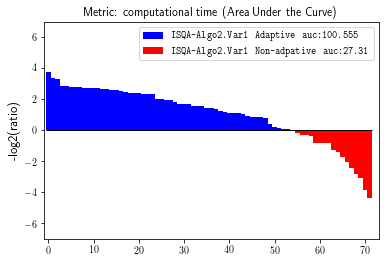

In [15]:
final = {}
final['4-projectedGD-True-0.99999-0.1'] = df_4
final['4_fallback0-projectedGD-True-0.99999-0.1'] = df_42

ppf = PerformanceProfile(final, failcode=2)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
_ = ppf.plot(column='time',show_num=False, options={'ratio_max':7}, save=True, saveDir='./natOG/', labels=['ISQA-Algo2.Var1 Adaptive', 'ISQA-Algo2.Var1 Non-adpative'])

In [16]:
cols = ['datasetid', 'F', 'time', 'nz']
df24_merged = pd.merge(df_42, df_4, on='datasetid', suffixes=("_type42", "_type4"), how='left')
better24_z = np.sum((df24_merged['nz_type42'] - df24_merged['nz_type4']) > 0 ) 
same24_z = np.sum((df24_merged['nz_type42'] - df24_merged['nz_type4']) == 0 ) 
worse24_z = np.sum((df24_merged['nz_type42'] - df24_merged['nz_type4']) <0 ) 

better24_F = np.sum((df24_merged['F_type42'] - df24_merged['F_type4']) < -1e-8 ) 
same24_F = np.sum(np.abs(df24_merged['F_type42'] - df24_merged['F_type4']) <=1e-8 ) 
worse24_F = np.sum((df24_merged['F_type42'] - df24_merged['F_type4']) > 1e-8 ) 

print("For 4_2-4 comparsion:\n==========================")
print(" In terms final F:")
print(f"  better:{better24_F} | same:{same24_F} | worse: {worse24_F}")
print(" In terms #z:")
print(f"  better:{better24_z} | same:{same24_z} | worse: {worse24_z}")

For 4_2-4 comparsion:
 In terms final F:
  better:1 | same:8 | worse: 63
 In terms #z:
  better:7 | same:38 | worse: 27
